In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_excel('/content/iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
#processing with the missing values
for i in ['SL','SW','PL','PW']:
  df[i]= df[i].fillna(df[i].mean())

<ipython-input-319-10dd6b872433>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,fmt =" .0%" )


<Axes: >

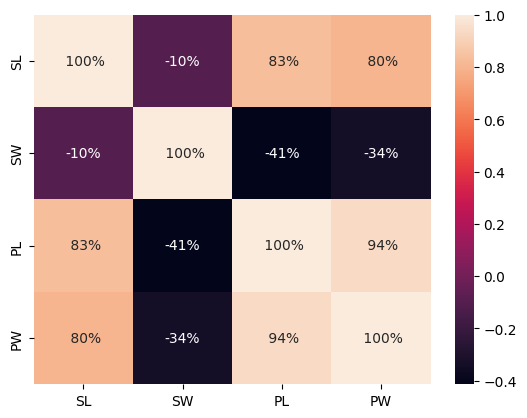

In [ ]:
sns.heatmap(df.corr(),annot = True,fmt =" .0%" )

In [ ]:
#label encoding the classification column to convert into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
df.head(100)

,SL,SW,PL,PW,Classification
0,5.100000,3.500000,1.4,0.2,0
1,4.900000,3.000000,1.4,0.2,0
2,5.855944,3.200000,1.3,0.2,0
3,4.600000,3.100000,1.5,0.2,0
4,5.000000,3.600000,1.4,0.2,0
...,...,...,...,...,...
95,5.700000,3.000000,4.2,1.2,1
96,5.700000,2.900000,4.2,1.3,1
97,6.200000,2.900000,4.3,1.3,1
98,5.100000,3.049306,3.0,1.1,1


In [ ]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [ ]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
#Creating varibales 
x = df.drop(['Classification'],axis = 1)
y = df['Classification']
#SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25)

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [ ]:
#MAKING PREDICIONS with regressor
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 9,  1,  0],
       [ 0, 11,  2],
       [ 0,  1, 14]])

In [ ]:
print('accuracy_score = ',accuracy_score(y_test,y_pred))
print('MSE = ',mean_squared_error(y_test,y_pred))

accuracy_score =  0.8947368421052632
MSE =  0.10526315789473684


In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = []
neighbors = np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_predt = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predt)
  metric_k.append(acc)

In [ ]:
metric_k

[0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.8947368421052632]

In [ ]:
print("KNN_Accuracy: ", accuracy_score(y_test,y_predt) * 100)

KNN_Accuracy:  89.47368421052632


In [ ]:
#svm model
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
#predictions with SVM model
y_svc_pred = svmclf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print('3.SVM_Accuracy is ',accuracy_score(y_test,y_svc_pred))

3.SVM_Accuracy is  0.9210526315789473


In [ ]:
confusion_matrix(y_test,y_svc_pred)

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  1, 14]])

In [ ]:
## Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
#prediction with Decision Tree
y_dlt_pred = dt_clf.predict(x_test)

In [ ]:
print('DecisionTree_Accuracy is ',accuracy_score(y_test,y_dlt_pred))

DecisionTree_Accuracy is  0.9210526315789473


In [ ]:
confusion_matrix(y_test,y_dlt_pred)

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  1, 14]])

In [ ]:
##Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rt_clf = RandomForestClassifier()
rt_clf.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
#predition with the Random Forest model
y_rt_pred = rt_clf.predict(x_test)
print('RandomForest_Accuracy is ',accuracy_score(y_test,y_rt_pred))

RandomForest_Accuracy is  0.9473684210526315


In [ ]:
confusion_matrix(y_test,y_rt_pred)

array([[10,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 15]])

In [ ]:
#Results of Various Models
print('1.LogistiRegression_accuracy_score = ',accuracy_score(y_test,y_pred)*100)
print('MSE = ',mean_squared_error(y_test,y_pred))
print("2.KNN_Accuracy: ", accuracy_score(y_test,y_predt) * 100)
print('MSE = ',mean_squared_error(y_test,y_predt))
print('3.SVM_Accuracy is ',accuracy_score(y_test,y_svc_pred)*100)
print('MSE = ',mean_squared_error(y_test,y_svc_pred))
print('4.DecisionTree_Accuracy is ',accuracy_score(y_test,y_dlt_pred)*100)
print('MSE = ',mean_squared_error(y_test,y_dlt_pred))
print('5.RandomForest_Accuracy is ',accuracy_score(y_test,y_rt_pred)*100)
print('MSE = ',mean_squared_error(y_test,y_rt_pred))

1.LinearRegression_accuracy_score =  89.47368421052632
MSE =  0.10526315789473684
2.KNN_Accuracy:  89.47368421052632
MSE =  0.10526315789473684
3.SVM_Accuracy is  92.10526315789474
MSE =  0.07894736842105263
4.DecisionTree_Accuracy is  92.10526315789474
MSE =  0.07894736842105263
5.RandomForest_Accuracy is  94.73684210526315
MSE =  0.05263157894736842
